# Preámbulo de librerias

In [1]:
!pip install matplotlib
!pip install numpy
!pip install Pillow

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Problema de Fusión de Imagen

## Definición

Sea una imagen RGB de baja resolución $Y \in \mathbb{R}^{64 \times 64 \times 3}$ y una imagen en escala de grises de alta resolución $Z \in \mathbb{R}^{128 \times 128}$. Se quiere tener una imagen a alta resolucion a color usando la información de $Y$ y $Z$, entonces se definen las siguientes ecuaciones:

$$
\begin{gather}
z = Dx \\
y = Rx
\end{gather}
$$

Sean las imagenes:

Text(0.5, 1.0, 'Low resolution in color')

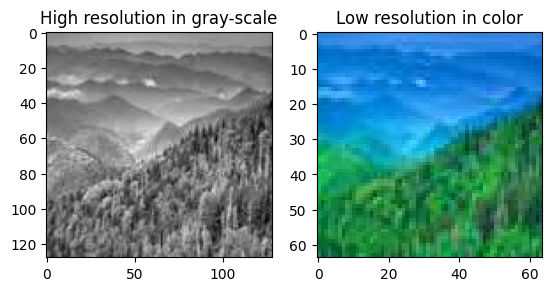

In [2]:
low_res = Image.open("../resources/images/lab4/low_res.jpg")
high_res = Image.open("../resources/images/lab4/high_res.jpg")

plt.subplot(1,2,1)
plt.imshow(high_res, cmap = "gray")
plt.title("High resolution in gray-scale")
plt.subplot(1,2,2)
plt.imshow(low_res)
plt.title("Low resolution in color")

## Vectorización

En las ecuaciones aparecen $z$, $y$ y $x$, esto es porque son las versiones vectorizadas de las imagenes. Las imagenes se vectorizan columna a columna, una debajo de la otra. Después de haber concatenado todas las columnas de una capa (imagenes de color), se empieza con la concatenación de la misma forma para el siguiente canal. Si $X_r$ denota el primer canal de la imagen a color (color rojo), entonces la vectorización quedaría:

$$
X_r \in \mathbb{R}^{n \times n},\ 
X_r =
\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1n}\\
x_{21} & x_{22} & \ldots & x_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \ldots & x_{nn}
\end{bmatrix}
$$

Si vectorizamos el canal, quedaría:

$$
\textbf{x}_r \in \mathbb{R}^{n^2 \times 1},\ 
\textbf{x}_r =
\begin{bmatrix}
x_{11} \\
x_{21} \\
\vdots \\
x_{n1} \\
x_{12} \\
x_{22} \\
\vdots \\
x_{n2} \\
\vdots \\
x_{nn} \\
\end{bmatrix}
$$

Concatenamos los canales, es decir: $\textbf{x}_r$, $\textbf{x}_g$ y $\textbf{x}_b$.

$$
\textbf{x} \in \mathbb{R}^{3n^2 \times 1},\ 
\textbf{x} =
\begin{bmatrix}
\textbf{x}_r \\
\textbf{x}_g \\
\textbf{x}_b \\
\end{bmatrix}
$$

# Desarrollo

## 1. Construir las matrices de sensado

Para el caso en que necesitamos reconstruir la matriz $D$, que nos produce la imagen $Z$ que es de alta resolución pero en escala de grises. Determinamos que debemos tomar cada pixel de los tres canales de la "imagen original" y obtener el promedio. El promedio será el valor de intensidad que está representado por la escala de grises.

$$
\textbf{z}_i = \sum^{3n^2}_{i = 1} \frac{\textbf{x}_{ri} + \textbf{x}_{gi} + \textbf{x}_{bi}}{3}
$$

Para representar esta operación utilizamos la matriz identidad para tomar un solo valor por canal al tiempo. Como en $\textbf{x}$ ya están concatenados los tres canales, entonces concatenamos tres matrices identidad para tomar un valor por cada canal al tiempo. En total estaremos tomando los 3 valores por correspondientes por pixel.

$$
\boxed{D = \frac{1}{3} \begin{bmatrix} I_{n^2} & I_{n^2} & I_{n^2} \end{bmatrix}}
$$

Para el caso en que necesitamos reconstruir $R$, que nos produce la imagen $Y$ que es de baja resolución pero a color. Determinamos que debemos tomar dos pares de pixeles contiguos en cada canal de la "imagen original" y obtener el promedio. Obtendremos tres valores promedio que serán los valores que corresponderan a los tres valores de intensidad en los canales que tiene cada pixel en baja resolución.

$$
\begin{gather}
\textbf{y}_i = \begin{bmatrix}
\textbf{y}_{ri} \\
\textbf{y}_{gi} \\
\textbf{y}_{bi} \\
\end{bmatrix} \\
\textbf{y}_r \in \mathbb{R}^{(n/2)^2 \times 1},\ 
\textbf{y}_{ri} = 
\sum^{(n/2) - 1}_{k = 0} \sum^{(n/2) - 1}_{i = 0} 
\frac{\textbf{x}_{r(2nk + (2i + 1))} + \textbf{x}_{r(2nk + (2i + 2))} + \textbf{x}_{r(2nk + (n + 2i + 1))} + \textbf{x}_{r(2nk + (n + 2i + 2))}}{4}
\end{gather}
$$

La expresión de $\textbf{y}_{ri}$ nos permite obtener la valores de intensidad para el canal rojo en baja resolución, utilizando la forma vectorizada $\textbf{x}_{r}$. Esta expresión es utilizable para las formas vectorizadas de los demás canales. Para representar esta operación usamos una matriz con dos diagonales en 1, la principal y la que está por encima de esta. Esta matriz es de la forma:

$$
\begin{gather}
S_r \in \mathbb{R}^{n \times n},\ 
S_r = \begin{bmatrix} Sb_r & Sb_r \end{bmatrix} \\
Sb_r \in \mathbb{R}^{(n/2 - 1) \times n^2},\ 
Sb_r =
\begin{bmatrix}
1 & 1 & 0 & 0 &\ldots & 0 & 0 \\
0 & 0 & 1 & 1 &\ldots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 & 1 \\
\end{bmatrix}
\end{gather}
$$

Finalmente, concatemos las matrices $S_r$ para aplicarlas a todos los canales.

$$
\boxed{R = \frac{1}{4} \begin{bmatrix} S_r & S_r & S_r \end{bmatrix}}
$$